## Полиномиальная регрессия

### Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as skl

### Чтение данных

In [12]:
df = pd.read_csv('Original_data_with_more_rows.csv')
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...
30636,995,male,group C,some high school,standard,none,56,47,51
30637,996,male,group E,associate's degree,free/reduced,none,74,75,72
30638,997,male,group C,some college,standard,none,36,29,27
30639,998,male,group A,some high school,free/reduced,completed,43,34,39


### Предварительный анализ и визуализация

In [13]:
df.describe()

,Unnamed: 0,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,66.749355,69.624980,68.468327
std,288.747894,15.206049,14.671572,15.307814
min,0.000000,0.000000,10.000000,5.000000
25%,249.000000,56.000000,60.000000,58.000000
50%,500.000000,67.000000,70.000000,69.000000
75%,750.000000,78.000000,80.000000,79.000000
max,999.000000,100.000000,100.000000,100.000000


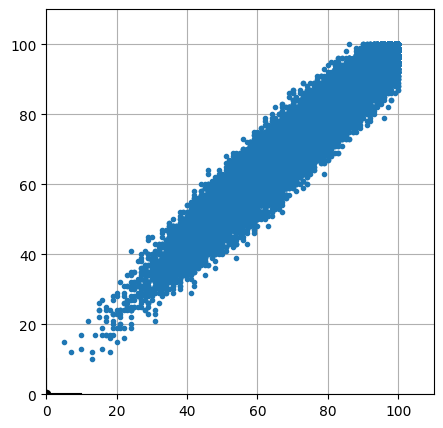

In [18]:
plt.figure(figsize=(5,5))

plt.xlim(0, 110)
plt.ylim(0, 110)
plt.grid()
plt.plot(0,0, "o", color='black')
plt.plot(np.arange(-5, 11), np.arange(-5, 11)*0, "-", color='black')
plt.plot(np.arange(-5, 11)*0, np.arange(-5, 11), "-", color='black')

plt.plot(df['WritingScore'], df['ReadingScore'],'.')

plt.show()

In [21]:
X = df[['WritingScore']].to_numpy()
y = df[['ReadingScore']].to_numpy()
model = skl.LinearRegression()
model.fit(X, y)
model.score(X, y)

0.9083892324038729

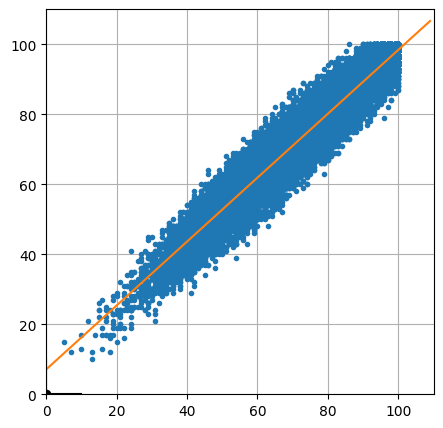

In [23]:
plt.figure(figsize=(5,5))

plt.xlim(0, 110)
plt.ylim(0, 110)
plt.grid()
plt.plot(0,0, "o", color='black')
plt.plot(np.arange(-5, 11), np.arange(-5, 11)*0, "-", color='black')
plt.plot(np.arange(-5, 11)*0, np.arange(-5, 11), "-", color='black')

plt.plot(df['WritingScore'], df['ReadingScore'],'.')
plt.plot(np.arange(0, 110), model.predict(np.arange(0,110).reshape(-1,1)),'-')

plt.show()

In [24]:
print(model.coef_ , model.intercept_)


[[0.91348087]] [7.08047274]


#### Квадратичная модель

In [27]:
#Генерация признаков
df['X^2'] = df['WritingScore']**2


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore,X^2
0,0,female,group B,bachelor's degree,standard,none,72,72,74,5476
1,1,female,group C,some college,standard,completed,69,90,88,7744
2,2,female,group B,master's degree,standard,none,90,95,93,8649
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,1936
4,4,male,group C,some college,standard,none,76,78,75,5625
...,...,...,...,...,...,...,...,...,...,...
30636,995,male,group C,some high school,standard,none,56,47,51,2601
30637,996,male,group E,associate's degree,free/reduced,none,74,75,72,5184
30638,997,male,group C,some college,standard,none,36,29,27,729
30639,998,male,group A,some high school,free/reduced,completed,43,34,39,1521


In [28]:
X = df[['WritingScore', 'X^2']].to_numpy()
y = df[['ReadingScore']].to_numpy()
model = skl.LinearRegression()
model.fit(X, y)
model.score(X, y)

0.9084591006009473

In [32]:
df_pred = pd.DataFrame()
df_pred['a'] = np.arange(0, 110)
df_pred['a^2'] = df_pred['a']**2
X_pred = df_pred.to_numpy()

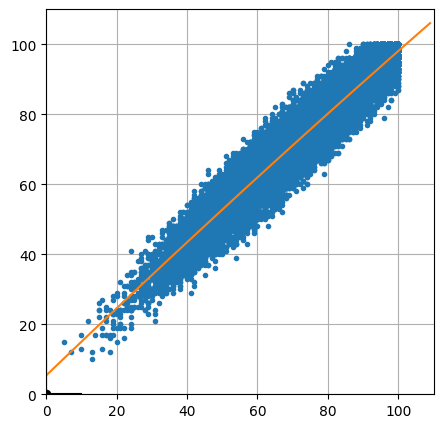

In [33]:

plt.figure(figsize=(5,5))

plt.xlim(0, 110)
plt.ylim(0, 110)
plt.grid()
plt.plot(0,0, "o", color='black')
plt.plot(np.arange(-5, 11), np.arange(-5, 11)*0, "-", color='black')
plt.plot(np.arange(-5, 11)*0, np.arange(-5, 11), "-", color='black')

plt.plot(df['WritingScore'], df['ReadingScore'],'.')
plt.plot(np.arange(0, 110), model.predict(X_pred),'-')

plt.show()

In [35]:
print(model.coef_ , model.intercept_)

[[ 9.67804598e-01 -4.04239742e-04]] [5.35078045]


#### Кубическая модель

In [36]:
#Генерация признаков
df['X^3'] = df['WritingScore']**3

In [37]:
X = df[['WritingScore', 'X^2', 'X^3']].to_numpy()
y = df[['ReadingScore']].to_numpy()
model = skl.LinearRegression()
model.fit(X, y)
model.score(X, y)

0.9084618033482049

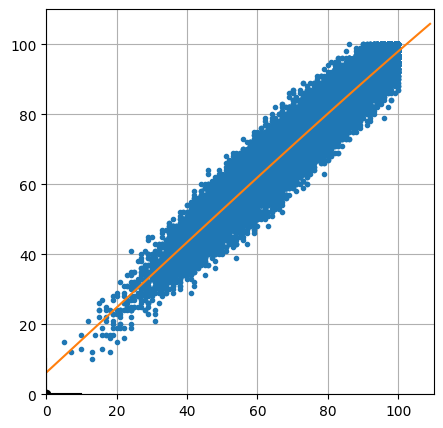

In [38]:
df_pred = pd.DataFrame()
df_pred['a'] = np.arange(0, 110)
df_pred['a^2'] = df_pred['a']**2
df_pred['a^3'] = df_pred['a']**3
X_pred = df_pred.to_numpy()

plt.figure(figsize=(5,5))

plt.xlim(0, 110)
plt.ylim(0, 110)
plt.grid()
plt.plot(0,0, "o", color='black')
plt.plot(np.arange(-5, 11), np.arange(-5, 11)*0, "-", color='black')
plt.plot(np.arange(-5, 11)*0, np.arange(-5, 11), "-", color='black')

plt.plot(df['WritingScore'], df['ReadingScore'],'.')
plt.plot(np.arange(0, 110), model.predict(X_pred),'-')

plt.show()